In [ ]:
#!/usr/bin/env python
import os
import pandas as pd
import numpy as np
from numpy import savetxt
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, ADASYN
from skimage import io
from sklearn.feature_selection import VarianceThreshold
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import random
import os.path

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#https://drive.google.com/file/d/162jF_QYy7_-fMEBpw9g5p3ejPc2btzow/view?usp=sharing
URL_training = 'https://drive.google.com/file/d/1omw0_whYBUZIHQTBvqd9SJI-z66CkapO/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL_training.split('/')[-2]
#df = pd.read_pickle(path)
#training_data = pd.read_csv(path)
#training_data.head()
#print(training_data)



#training_data['s1'] = np.log2((training_data['s1'])+1)

#(training_data)

#features_raw = np.array(training_data.iloc[:, training_data.columns != 'class'], dtype=float)
#features = np.log2(1.0 + features_raw)
#first_column=training_data. iloc[:, 0]

#features = np.insert(features, 0, first_column, axis=1)


#print(features)

# Import the pretrained CNN 'ResNet50'
model = tf.keras.applications.resnet50.ResNet50()




# Visualize the different layers
#model.summary()





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions



# Import the pretrained CNN 'ResNet50'
model = tf.keras.applications.resnet50.ResNet50()





# Visualize the different layers
model.summary()
print(len(model.layers))

In [ ]:
#https://drive.google.com/file/d/162jF_QYy7_-fMEBpw9g5p3ejPc2btzow/view?usp=sharing
URL_training = 'https://drive.google.com/file/d/1omw0_whYBUZIHQTBvqd9SJI-z66CkapO/view?usp=sharing'
path = "/content/drive/MyDrive/Colab Notebooks/big_data.csv"
#df = pd.read_pickle(path)
training_data = pd.read_csv(path)
training_data.head()
print(training_data)

In [ ]:
#features_raw = np.array(training_data.iloc[:, training_data.columns != 'class'], dtype=float)
#features = np.log2(1.0 + features_raw)
#first_column=training_data. iloc[:, 0]
#features = np.insert(features, 0, first_column, axis=1)





In [ ]:
features_raw = np.array(training_data.iloc[:, training_data.columns != 'class'], dtype=float)
features = np.round((features_raw*255.0)/24248)
first_column=training_data. iloc[:, 0]

features = np.insert(features, 0, first_column, axis=1)
print(features)

[[ 1.  0.  0. ...  6.  8.  0.]
 [ 1.  0.  0. ...  8.  6.  0.]
 [ 1.  0.  0. ...  5.  1.  0.]
 ...
 [36.  0.  0. ...  9.  1.  0.]
 [36.  0.  0. ...  4.  9.  0.]
 [36.  0.  0. ...  7.  3.  0.]]


In [ ]:
from PIL import Image
import cv2
import os
import matplotlib.pyplot as plt

path_dir = "/content/drive/MyDrive/Colab Notebooks/NewClass5/"
result=[]
index=0
for a in range(10000,13201):
  ar=features[a]

         
  if(ar[0] == 1.0):
    dirName = 'ACC'
  elif(ar[0] == 2.0):
    dirName = 'BLCA'
  elif(ar[0] == 3.0):
    dirName = 'BRCA'
  elif(ar[0] == 4.0):
    dirName = 'CESC'
  elif(ar[0] == 5.0):
    dirName = 'CHOL'
  elif(ar[0] == 6.0):
    dirName = 'COAD'
  elif(ar[0] == 7.0):
    dirName = 'DLBC'
  elif(ar[0] == 8.0):
    dirName = 'ESCA'
  elif(ar[0] == 9.0):
    dirName = 'GBM'
  elif(ar[0] == 10.0):
    dirName = 'HNSC'
  elif(ar[0] == 11.0):
    dirName = 'KICH'
  elif(ar[0] == 12.0):
    dirName = 'KIRC'
  elif(ar[0] == 13.0):
    dirName = 'KIRP'
  elif(ar[0] == 14.0):
    dirName = 'LAML'
  elif(ar[0] == 15.0):
    dirName = 'LGG'
  elif(ar[0] == 16.0):
    dirName = 'LIHC'
  elif(ar[0] == 17.0):
    dirName = 'LUAD'  
  elif(ar[0] == 18.0):
    dirName = 'LUSC'
  elif(ar[0] == 19.0):
    dirName = 'MESO'  
  elif(ar[0] == 20.0):
    dirName = 'OV'  
  elif(ar[0] == 21.0):
    dirName = 'PAAD'  
  elif(ar[0] == 22.0):
    dirName = 'PCPG' 
  elif(ar[0] == 23.0):
    dirName = 'PRAD'
  elif(ar[0] == 24.0):
    dirName = 'READ'
  elif(ar[0] == 25.0):
    dirName = 'SARC'
  elif(ar[0] == 26.0):
    dirName = 'SKCM'
  elif(ar[0] == 27.0):
    dirName = 'STAD'
  elif(ar[0] == 28.0):
    dirName = 'TGCT'
  elif(ar[0] == 29.0):
    dirName = 'THCA'
  elif(ar[0] == 30.0):
    dirName = 'THYM'
  elif(ar[0] == 31.0):
    dirName = 'UCEC'
  elif(ar[0] == 32.0):
    dirName = 'UCS'
  elif(ar[0] == 33.0):
    dirName = 'UVM'
  if not os.path.exists('/content/drive/MyDrive/Colab Notebooks/NewClass5/'+dirName):
	    os.mkdir(os.path.join(path_dir, dirName))
  

  
  geneArray=np.zeros((224,224,3))
  

  
  i=0
  j=0
  k=0

  m=1
  for i in range(0, 224):
    for j in range(0, 224,7):
      if m < 6844:
        geneArray[i][j][0]=ar[m]
        geneArray[i][j+1][0]=ar[m]
        geneArray[i][j+2][0]=ar[m]
        geneArray[i][j+3][0]=ar[m]
        geneArray[i][j+4][0]=ar[m]
        geneArray[i][j+5][0]=ar[m]
        geneArray[i][j+6][0]=ar[m]
        
        m=m+1
      else :
        geneArray[i][j][0]=0.0

  
  

  n=6844

  for i in range(0, 224,7):
    for j in range(0, 224):
      if n < 13688:
        geneArray[i][j][1]=ar[n]
        geneArray[i+1][j][1]=ar[n]
        geneArray[i+2][j][1]=ar[n]
        geneArray[i+3][j][1]=ar[n]
        geneArray[i+4][j][1]=ar[n]
        geneArray[i+5][j][1]=ar[n]
        geneArray[i+6][j][1]=ar[n]
        n=n+1
      else :
        geneArray[i][j][1]=0.0

  o=13688

  for i in range(0, 224):
    for j in range(0, 224,7):
      if o < 20533:
        geneArray[i][j][2]=ar[o]
        geneArray[i][j+1][2]=ar[o]
        geneArray[i][j+2][2]=ar[o]
        geneArray[i][j+3][2]=ar[o]
        geneArray[i][j+4][2]=ar[o]
        geneArray[i][j+5][2]=ar[o]
        geneArray[i][j+6][2]=ar[o]
        o=o+1
      else :
        geneArray[i][j][2]=0.0

  result.append(geneArray)
  num=str(a)


  plt.imshow(result[index])
  index=index+1
  #plt.show()

 
  plt.savefig('/content/drive/MyDrive/Colab Notebooks/NewClass5/'+dirName+'/'+'img'+num+'.png')
  plt.close()
  #plt.save('/content/drive/MyDrive/Colab Notebooks/TrainingNew1/'+dirName+'/'+'img'+num, geneArray)
  #img = Image.fromarray(geneArray, 'RGB')
  #img.resize((224,224))
  #print(img.size)
  #num=str(a)
  #img.save('/content/drive/MyDrive/Colab Notebooks/Training1/'+dirName+'/'+'img'+num+'.png')
  #img.show()



In [ ]:
import matplotlib.pyplot as plt
 
plt.imshow(result[1])
#plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Training1/'+dirName+'/'+'img'+num+'.png')
plt.close()


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from keras.utils.vis_utils import plot_model


In [ ]:
model = tf.keras.applications.DenseNet121(weights='imagenet')
base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top = False)

print(len(base_model.layers))

In [ ]:
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalAveragePooling2D,MaxPooling3D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
for i, layer in enumerate(base_model.layers):
  print(i, layer.name)
x = base_model.output


x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(512, activation='relu')(x)
x = Dropout(rate=0.4)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = Dropout(rate=0.4)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

preds = tf.keras.layers.Dense(5, activation ='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=preds)
#print(model.summary())
print(len(model.layers))

In [ ]:
#for layer in model.layers[:40]:
  #layer.trainable = False

In [ ]:
#for layer in model.layers[40:]:
  #layer.trainable = True
!pip install split-folders
!pip install split-folders tqdm
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Colab Notebooks/5Fold/train', output='/content/drive/MyDrive/Colab Notebooks/5Fold/fold0',
                    seed=1337, ratio=(.3, .3, .4))

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/5Fold/val/', 
                                                   target_size = (224, 224),
                                                   color_mode = 'rgb',
                                                   batch_size = 32,
                                                   class_mode = 'categorical',
                                                   shuffle = True)

In [ ]:
!cp -av '/content/drive/MyDrive/Colab Notebooks/5Fold/fold4' '/content/drive/MyDrive/Colab Notebooks/5Fold/test4/valid'

In [ ]:
print(model.summary())
for i, layer in enumerate(model.layers):
  print(i, layer.name)
  print(i,layer.trainable)

In [ ]:
import os
FOLDER_PATH = 'Colab Notebooks/NewClass5Test1/val/UCEC'
ROOT_PATH = '/content/drive/MyDrive/'
print(len(os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH))))

32


In [ ]:
import math
from sklearn.model_selection import KFold
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/NewClass12Test1/train/', 
                                                   target_size = (224, 224),
                                                   color_mode = 'rgb',
                                                   batch_size = 32,
                                                   class_mode = 'categorical',
                                                   shuffle = True)
#test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)
#test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/NewTraining7/test/', 
#                                                 target_size = (224, 224),
#                                                 color_mode = 'rgb',
#                                                  batch_size = 32,
 #                                                 class_mode = 'categorical',
  #                                                shuffle = False)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)
valid_set = val_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/NewClass12Test1/val/', 
                                                   target_size = (224, 224),
                                                   color_mode = 'rgb',
                                                   batch_size = 32,
                                                   class_mode = 'categorical',
                                                   shuffle = False)


#train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Training2/', 
 #                                                  target_size = (224, 224),
  #                                                 color_mode = 'rgb',
     #                                              batch_size = 32,
        #                                           class_mode = 'categorical',
          #                                         shuffle = True)

k = 5
kf = KFold(n_splits=k, random_state=None)
for train, test in kf.split(train_set):
  print('Hello')
  print(train)
  print(test)
    #print('Training Data: %d,Testing Data: %d' % (train_set[train], train_set[test]))
kf.get_n_splits(train_set)



Found 4867 images belonging to 12 classes.
Found 1223 images belonging to 12 classes.
Hello
[ 31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
Hello
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 1

5

In [ ]:
k = 1
for k in range(1,6):
  print(k)

1
2
3
4
5


In [ ]:
import scikitplot as skplt


ERROR: Could not find a version that satisfies the requirement plot_conf_matr (from versions: none)
ERROR: No matching distribution found for plot_conf_matr


In [ ]:
import math
from keras import optimizers, applications
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix


from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
batch_size = 32
model.trainable = True
#model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer= SGD(momentum = 0.4, learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy','AUC'])


# Saving the model according to the conditions  

OutputDir = '/content/drive/MyDrive/Colab Notebooks/5Fold/'

checkpoint = tf.keras.callbacks.ModelCheckpoint(OutputDir+"densenet121_test1(12clz)_kcrossval.h5", monitor='accuracy', verbose=1, save_best_only=True, mode='auto')

# Early Stopping is a regularization method (To minimize overfitting)
early = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0, patience=10, verbose=1, mode='auto')

reduct_L_rate = ReduceLROnPlateau(monitor='val_loss',factor=0.1, patience=20)

path1 = '/content/drive/MyDrive/Colab Notebooks/5Fold/test'

# Train the model
k = 1

for k in range(1,6):
  print("#FOLD"+str(k))
  train_path = path1+str(k)+'/train/'
  valid_path = path1+str(k)+'/valid/'
  train_set = train_datagen.flow_from_directory(train_path, 
                                                   target_size = (224, 224),
                                                   color_mode = 'rgb',
                                                   batch_size = 32,
                                                   class_mode = 'categorical',
                                                   shuffle = True)
                                             

  val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)
  valid_set = val_datagen.flow_from_directory(valid_path, 
                                                   target_size = (224, 224),
                                                   color_mode = 'rgb',
                                                   batch_size = 32,
                                                   class_mode = 'categorical',
                                                   shuffle = False)
  
  history1 = model.fit_generator(
                                train_set,
                                steps_per_epoch = train_set.samples//train_set.batch_size,
                                epochs = 150,
                                validation_data = valid_set,
                                validation_steps = valid_set.samples//valid_set.batch_size,
                                callbacks=[early,reduct_L_rate,checkpoint])
                                
  Y_pred = model.predict_generator(valid_set)
  y_pred = np.argmax(Y_pred, axis=1)

  cm = confusion_matrix(valid_set.classes, y_pred)
  category_names = ['0','1','2','3','4']
  plot_confusion_matrix(cm, labels = category_names , normalize=False)
  

#FOLD1
Found 1981 images belonging to 5 classes.
Found 431 images belonging to 5 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


KeyboardInterrupt: ignored

In [ ]:
Y_pred = model.predict_generator(valid_set)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(valid_set.classes, y_pred)
plot_confusion_matrix(cm, classes = category_names, title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_concrete.jpg')

In [ ]:
category_names = 'ABS','CDE'
print(category_names)
print(valid_set.classes)

In [ ]:
# list all data in history
print(history1.history.keys())

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc', 'lr'])


In [ ]:
model_accuarcy = history1.history['accuracy']
average_accuracy = sum(model_accuarcy)/len(model_accuarcy)
print(average_accuracy)

0.9997007052103678


In [ ]:
model_loss = history1.history['loss']
average_loss = sum(model_loss)/len(model_loss)
print(average_loss)

0.012957668708016476


In [ ]:
validation_accuarcy = history1.history['val_accuracy']
average_val_accuracy = sum(validation_accuarcy)/len(validation_accuarcy)
print(average_val_accuracy)


1.0


In [ ]:
val_loss = history1.history['val_loss']
average_val_loss = sum(val_loss)/len(val_loss)
print(average_val_loss)

0.006014548203287025


In [ ]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss for 5 classes')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

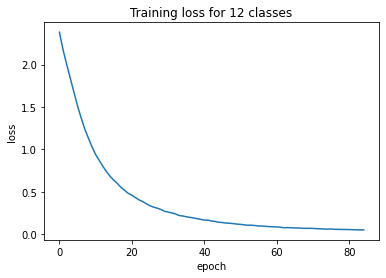

In [ ]:
plt.plot(history1.history['loss'])

plt.title('Training loss for 12 classes')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

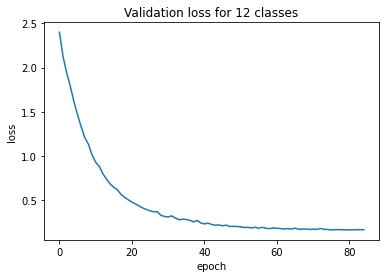

In [ ]:

plt.plot(history1.history['val_loss'])
plt.title('Validation loss for 12 classes')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

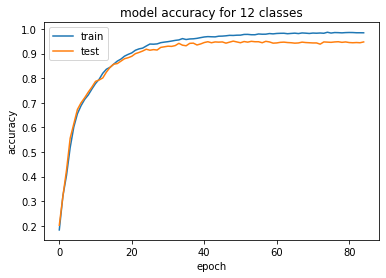

In [ ]:
# summarize history for loss
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy for 12 classes')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

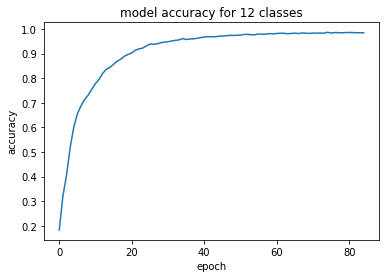

In [ ]:
plt.plot(history1.history['accuracy'])

plt.title('model accuracy for 12 classes')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

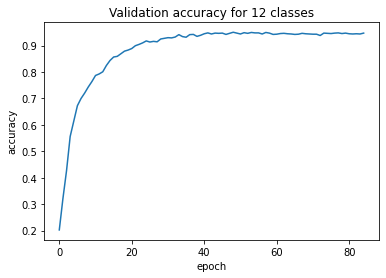

In [ ]:

plt.plot(history1.history['val_accuracy'])
plt.title('Validation accuracy for 12 classes')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

In [ ]:
print(train_set.classes)

[ 0  0  0 ... 11 11 11]
